**Problem Statement:**

"Assessment and Forecasting of the Status of Crime Cases in India to Ensure the Justice System's Efficiency"

**Context:**

In India, criminals are largely categorized under statuses, namely the Pending, Closed, or Under Investigation. In terms of these, it can be done through simple issues of loophole handling to the degree of crime complexity. Sometimes, there will be as many as tens of thousands of others waiting for their pending incidents to be resolved. In the end, it will result in the judicial system getting stuck and citizens losing their faith in law enforcement.
Comprehending such trends and case statuses patterns is of great help in the management of resources, policy, and getting more accurate results.

**Objective:**

The main task of the project is to learn about crime trends and then predict the degree of a criminal case in India based on historical data. The following will be the items that we are going to address:

The high number of pending cases. What is the reason behind it?
How will we identify cases that are most likely to end in the courts without any interference from the parties involved?

What are the key interventions or policies which could bring a significant improvement on the number of pending cases?



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/crime_dataset_india.csv')
df

,Crime_ID,Year,Month,Day,State,District,Crime_Type,Victim_Count,Accused_Count,Crime_Severity,Reporting_Time,Response_Time,Location_Type,Police_Station,Case_Status
0,CR0000001,2006,12,17,State_C,District_4,Cyber Crime,4,3,Low,13,30,Rural,PS_6,Closed
1,CR0000002,2019,3,22,State_D,District_1,Robbery,1,1,Medium,11,37,Urban,PS_9,Under Investigation
2,CR0000003,2014,4,11,State_A,District_2,Robbery,2,3,Low,21,0,Semi-Urban,PS_23,Under Investigation
3,CR0000004,2010,9,7,State_D,District_4,Murder,2,2,Medium,16,18,Rural,PS_22,Pending
4,CR0000005,2007,4,3,State_C,District_9,Cyber Crime,2,1,High,3,23,Rural,PS_4,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,CR0029996,2017,11,12,State_C,District_10,Theft,1,2,Medium,5,43,Rural,PS_28,Pending
29996,CR0029997,2019,2,25,State_D,District_1,Assault,5,3,Low,14,27,Rural,PS_16,Closed
29997,CR0029998,2005,3,7,State_D,District_15,Assault,2,1,Medium,20,39,Rural,PS_21,Closed
29998,CR0029999,2018,4,2,State_B,District_13,Cyber Crime,3,3,Low,1,16,Rural,PS_4,Pending


Purpose:
Loads the dataset into a pandas DataFrame and displays the first few rows to understand the structure of the data.

<Axes: xlabel='Case_Status', ylabel='count'>

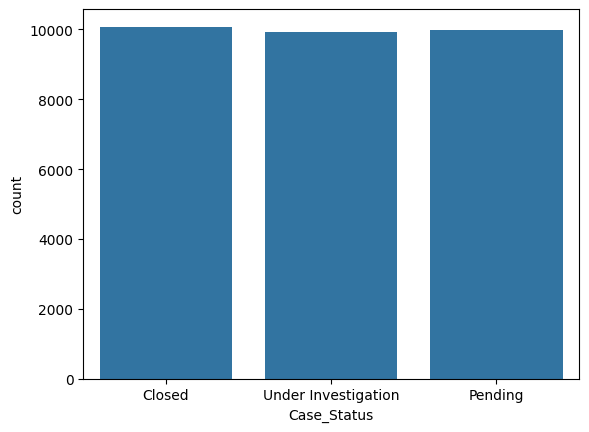

In [ ]:
sns.countplot(x='Case_Status', data=df)

Purpose:
Creates a count plot to visualize the frequency of different case statuses (e.g., Pending, Closed, Under Investigation).

In [ ]:
df.isnull().sum()

,0
Crime_ID,0
Year,0
Month,0
Day,0
State,0
District,0
Crime_Type,0
Victim_Count,0
Accused_Count,0
Crime_Severity,0


In [ ]:
df.duplicated().sum()

0

Purpose:
Identifies missing and duplicate data to understand the data quality and decide if cleaning is necessary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Crime_ID        30000 non-null  object
 1   Year            30000 non-null  int64 
 2   Month           30000 non-null  int64 
 3   Day             30000 non-null  int64 
 4   State           30000 non-null  object
 5   District        30000 non-null  object
 6   Crime_Type      30000 non-null  object
 7   Victim_Count    30000 non-null  int64 
 8   Accused_Count   30000 non-null  int64 
 9   Crime_Severity  30000 non-null  object
 10  Reporting_Time  30000 non-null  int64 
 11  Response_Time   30000 non-null  int64 
 12  Location_Type   30000 non-null  object
 13  Police_Station  30000 non-null  object
 14  Case_Status     30000 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.4+ MB


Purpose:
Provides information about the dataset, such as column names, data types, and non-null counts, to help with data understanding.

In [ ]:
df.describe()

,Year,Month,Day,Victim_Count,Accused_Count,Reporting_Time,Response_Time
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2011.582933,6.547367,14.548700,2.993400,1.995267,11.494167,23.509667
std,6.914081,3.428986,8.081494,1.412878,0.811911,6.926666,13.887030
min,2000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,2.000000,1.000000,6.000000,12.000000
50%,2012.000000,7.000000,15.000000,3.000000,2.000000,12.000000,23.000000
75%,2018.000000,10.000000,22.000000,4.000000,3.000000,17.000000,36.000000
max,2023.000000,12.000000,28.000000,5.000000,3.000000,23.000000,47.000000


Purpose:
Generates summary statistics (mean, median, max, etc.) for numerical columns to understand data ranges and distributions.

In [ ]:
from sklearn.preprocessing import  LabelEncoder
labelencoder = LabelEncoder()
df['Crime_ID'] = labelencoder.fit_transform(df['Crime_ID'])
df['State'] = labelencoder.fit_transform(df['State'])
df['District'] = labelencoder.fit_transform(df['District'])
df['Crime_Type'] = labelencoder.fit_transform(df['Crime_Type'])
df['Crime_Severity'] = labelencoder.fit_transform(df['Crime_Severity'])
df['Location_Type'] = labelencoder.fit_transform(df['Location_Type'])
df['Police_Station'] = labelencoder.fit_transform(df['Police_Station'])
df['Case_Status'] = labelencoder.fit_transform(df['Case_Status'])

Purpose:
Encodes categorical variables into numeric format for use in machine learning models.

In [ ]:
df

,Crime_ID,Year,Month,Day,State,District,Crime_Type,Victim_Count,Accused_Count,Crime_Severity,Reporting_Time,Response_Time,Location_Type,Police_Station,Case_Status
0,0,2006,12,17,2,14,1,4,3,1,13,30,0,26,0
1,1,2019,3,22,3,0,3,1,1,2,11,37,2,29,2
2,2,2014,4,11,0,11,3,2,3,1,21,0,1,15,2
3,3,2010,9,7,3,14,2,2,2,2,16,18,0,14,1
4,4,2007,4,3,2,19,1,2,1,0,3,23,0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,2017,11,12,2,1,4,1,2,2,5,43,0,20,1
29996,29996,2019,2,25,3,0,0,5,3,1,14,27,0,7,0
29997,29997,2005,3,7,3,6,0,2,1,2,20,39,0,13,0
29998,29998,2018,4,2,1,4,1,3,3,1,1,16,0,24,1


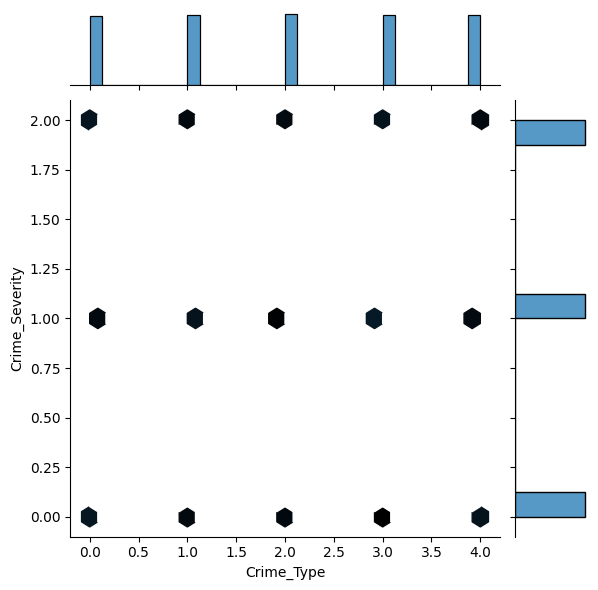

In [ ]:
sns.jointplot(x='Crime_Type',y='Crime_Severity',data=df,kind='hex')

Purpose:
Visualizes the relationship between Crime_Type and Crime_Severity to identify patterns or clusters.

<ipython-input-11-7b171d00278e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'])


<Axes: xlabel='Year', ylabel='Density'>

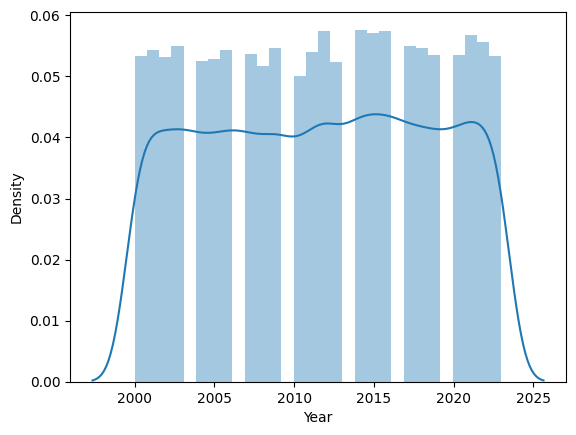

In [ ]:
sns.distplot(df['Year'])

Purpose:
Plots the distribution of Year to observe trends over time.

In [ ]:
crime_type = {0: 'Theft', 1: 'Robbery', 2: 'Murder', 3: 'Assault', 4: 'Cyber Crime'}
case_status = {0: 'Closed', 1: 'Pending', 2: 'Under Investigation'}

df['Crime_Type'] = df['Crime_Type'].map(crime_type)
df['Case_Status'] = df['Case_Status'].map(case_status)


Purpose:
Maps numeric labels back to original categorical values for easier interpretation during visualization.

<ipython-input-13-8a87479401ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Crime_Type', y='Case_Status', data=df, palette='rainbow')


Text(0.5, 1.0, 'Distribution of Case Status by Crime Type')

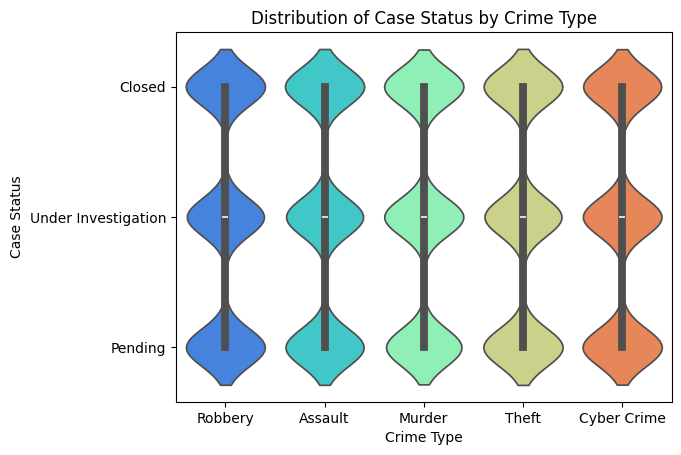

In [ ]:
sns.violinplot(x='Crime_Type', y='Case_Status', data=df, palette='rainbow')
plt.xlabel('Crime Type')
plt.ylabel('Case Status')
plt.title('Distribution of Case Status by Crime Type')


Purpose:
Shows the distribution of case statuses across different crime types.

In [ ]:
df['Crime_Type'] = labelencoder.fit_transform(df['Crime_Type'])
df['Case_Status'] = labelencoder.fit_transform(df['Case_Status'])

<Axes: xlabel='Victim_Count', ylabel='Crime_Type'>

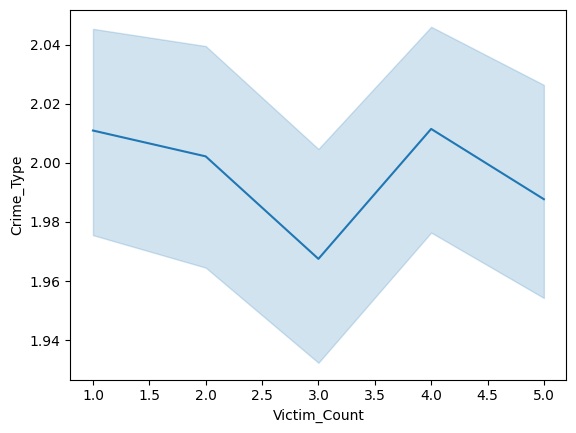

In [ ]:
sns.lineplot(x = 'Victim_Count',y = 'Crime_Type', data = df)

Purpose:
Analyzes the relationship between the number of victims and the type of crime.

<Axes: >

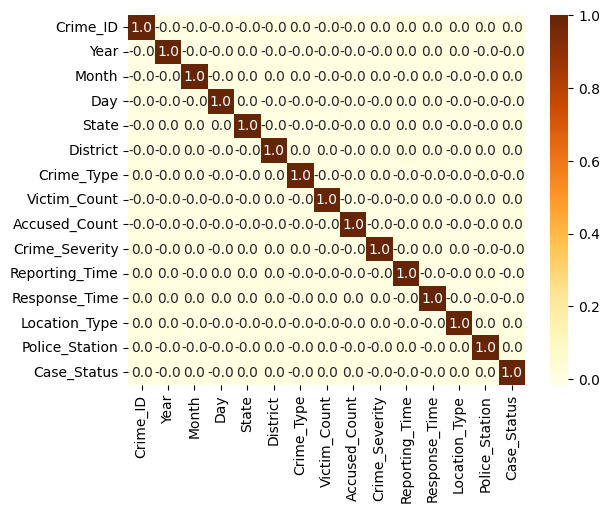

In [ ]:
corr_matrix=df.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='YlOrBr')

Purpose:
Displays correlations between features to identify relationships and help with feature selection.

In [ ]:
sor = df.corr()['Case_Status']
sor = sor.sort_values(ascending=False)
sor

,Case_Status
Case_Status,1.000000
State,0.007966
Victim_Count,0.007829
Police_Station,0.007819
District,0.007307
Location_Type,0.005467
Accused_Count,0.003083
Crime_ID,0.000539
Month,0.000485
Year,-0.000355


Purpose:
Sorts features based on their correlation with the target variable (Case_Status) to prioritize impactful features.

In [ ]:
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt
# %matplotlib inline

# X = df.drop('Case_Status', axis=1)
# Y = df['Case_Status']

# importances = mutual_info_classif(X, Y)
# feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
# feat_importances.plot(kind='barh', color = 'teal')
# plt.show()

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# # Apply RFE with logistic regression
# model = LogisticRegression()
# rfe = RFE(model, n_features_to_select=5)
# X_rfe = rfe.fit_transform(X, Y)

# print("Selected features:", X.columns[rfe.get_support()])

In [ ]:
df.columns

Index(['Crime_ID', 'Year', 'Month', 'Day', 'State', 'District', 'Crime_Type',
       'Victim_Count', 'Accused_Count', 'Crime_Severity', 'Reporting_Time',
       'Response_Time', 'Location_Type', 'Police_Station', 'Case_Status'],
      dtype='object')

In [ ]:
# df.drop(['Month','Response_Time','Crime_Type','Day','Crime_ID','Year','Police_Station','District','Crime_Severity'],axis=1,inplace=True)

In [ ]:
df

,Crime_ID,Year,Month,Day,State,District,Crime_Type,Victim_Count,Accused_Count,Crime_Severity,Reporting_Time,Response_Time,Location_Type,Police_Station,Case_Status
0,0,2006,12,17,2,14,3,4,3,1,13,30,0,26,0
1,1,2019,3,22,3,0,0,1,1,2,11,37,2,29,2
2,2,2014,4,11,0,11,0,2,3,1,21,0,1,15,2
3,3,2010,9,7,3,14,2,2,2,2,16,18,0,14,1
4,4,2007,4,3,2,19,3,2,1,0,3,23,0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,2017,11,12,2,1,1,1,2,2,5,43,0,20,1
29996,29996,2019,2,25,3,0,4,5,3,1,14,27,0,7,0
29997,29997,2005,3,7,3,6,4,2,1,2,20,39,0,13,0
29998,29998,2018,4,2,1,4,3,3,3,1,1,16,0,24,1


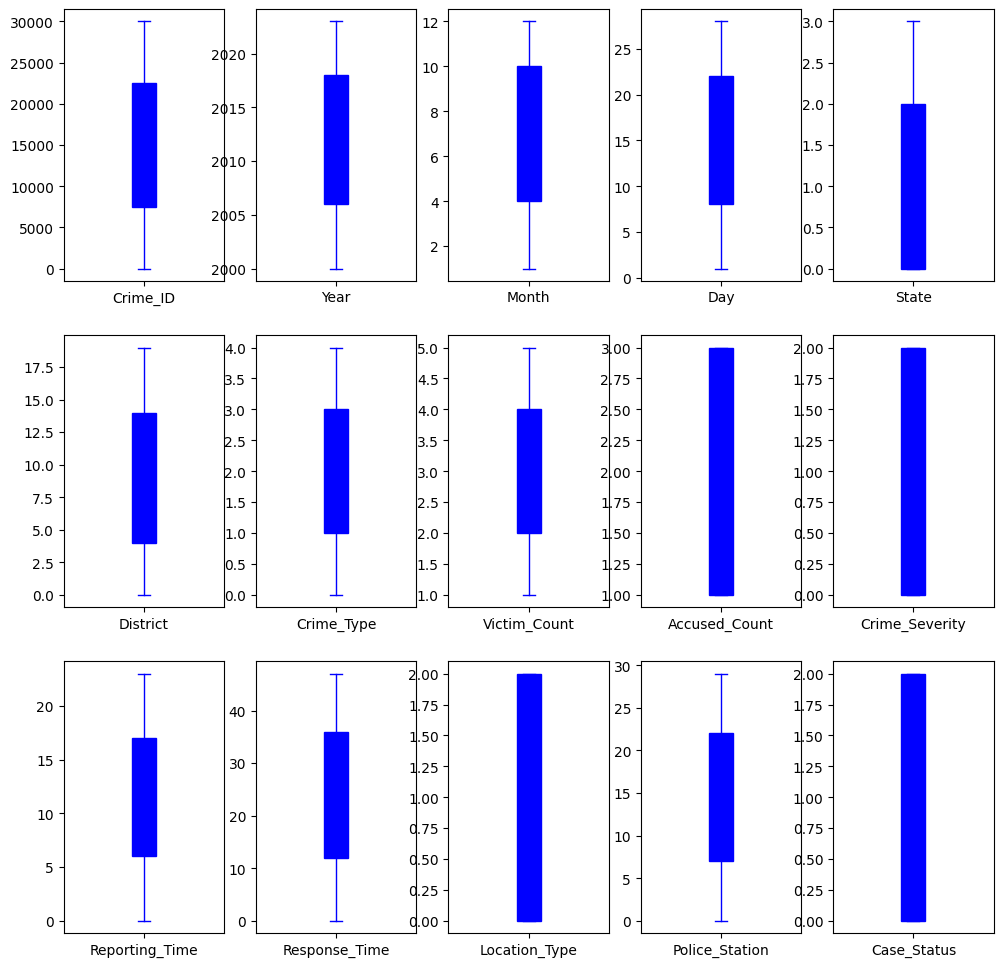

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(12,12),color='blue',patch_artist=True)
plt.show()

Purpose:
Visualizes feature distributions and detects outliers.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X = df.drop('Case_Status',axis=1)
Y = df['Case_Status']

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

Purpose:
Standardizes features to ensure all variables contribute equally to the model.

Splits the dataset into training (80%) and testing (20%) sets for model evaluation.

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Accuracy: 0.3308333333333333


In [ ]:
# from sklearn.svm import SVC
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Accuracy: 0.3335


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3396666666666667


Purpose:
Trains a Gradient Boosting Classifier on the training data.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[656, 642, 738],
       [641, 676, 725],
       [622, 594, 706]])

Purpose:
Evaluates the model's performance using accuracy and confusion matrix.

In [ ]:
Crime_ID = int(input("Enter Crime_ID: "))
Year = int(input("Enter Year: "))
Month = float(input("Enter Month: "))
Day = float(input("Enter Day: "))
State = float(input("Enter State: "))
District = float(input("Enter District: "))
Crime_Type = float(input("Enter Crime_Type: "))
Victim_Count = float(input("Enter Victim_Count: "))
Accused_Count = float(input("Enter Accused_Count: "))
Crime_Severity = float(input("Enter Crime_Severity: "))
Reporting_Time = float(input("Enter Reporting_Time: "))
Response_Time = float(input("Enter Response_Time: "))
Location_Type = float(input("Enter Location_Type: "))
Police_Station = float(input("Enter Police_Station: "))
user_input = [[Crime_ID,	Year,	Month,	Day,	State, District, Crime_Type, Victim_Count, Accused_Count, Crime_Severity, Reporting_Time, Response_Time, Location_Type, Police_Station]]
std = scaler.transform(user_input)
crime = model.predict(std)
print('The Predicted Case_Status:',crime)

Enter Crime_ID: 3
Enter Year: 2010
Enter Month: 9
Enter Day: 7
Enter State: 3
Enter District: 14
Enter Crime_Type: 2
Enter Victim_Count: 2
Enter Accused_Count: 2
Enter Crime_Severity: 2
Enter Reporting_Time: 16
Enter Response_Time: 18
Enter Location_Type: 0
Enter Police_Station: 14
The Predicted Case_Status: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Purpose:
Creates an interactive input interface to predict the case status based on user-provided details.

In [ ]:
df

,Crime_ID,Year,Month,Day,State,District,Crime_Type,Victim_Count,Accused_Count,Crime_Severity,Reporting_Time,Response_Time,Location_Type,Police_Station,Case_Status
0,0,2006,12,17,2,14,3,4,3,1,13,30,0,26,0
1,1,2019,3,22,3,0,0,1,1,2,11,37,2,29,2
2,2,2014,4,11,0,11,0,2,3,1,21,0,1,15,2
3,3,2010,9,7,3,14,2,2,2,2,16,18,0,14,1
4,4,2007,4,3,2,19,3,2,1,0,3,23,0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,2017,11,12,2,1,1,1,2,2,5,43,0,20,1
29996,29996,2019,2,25,3,0,4,5,3,1,14,27,0,7,0
29997,29997,2005,3,7,3,6,4,2,1,2,20,39,0,13,0
29998,29998,2018,4,2,1,4,3,3,3,1,1,16,0,24,1
